<a href="https://colab.research.google.com/github/jpasamar19/TallerVirtual/blob/main/TallerBioinformatica_1_Filogenia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TALLER VIRTUAL INTERACTIVO: Descubriendo las principales áreas de la Bioinformática**
---
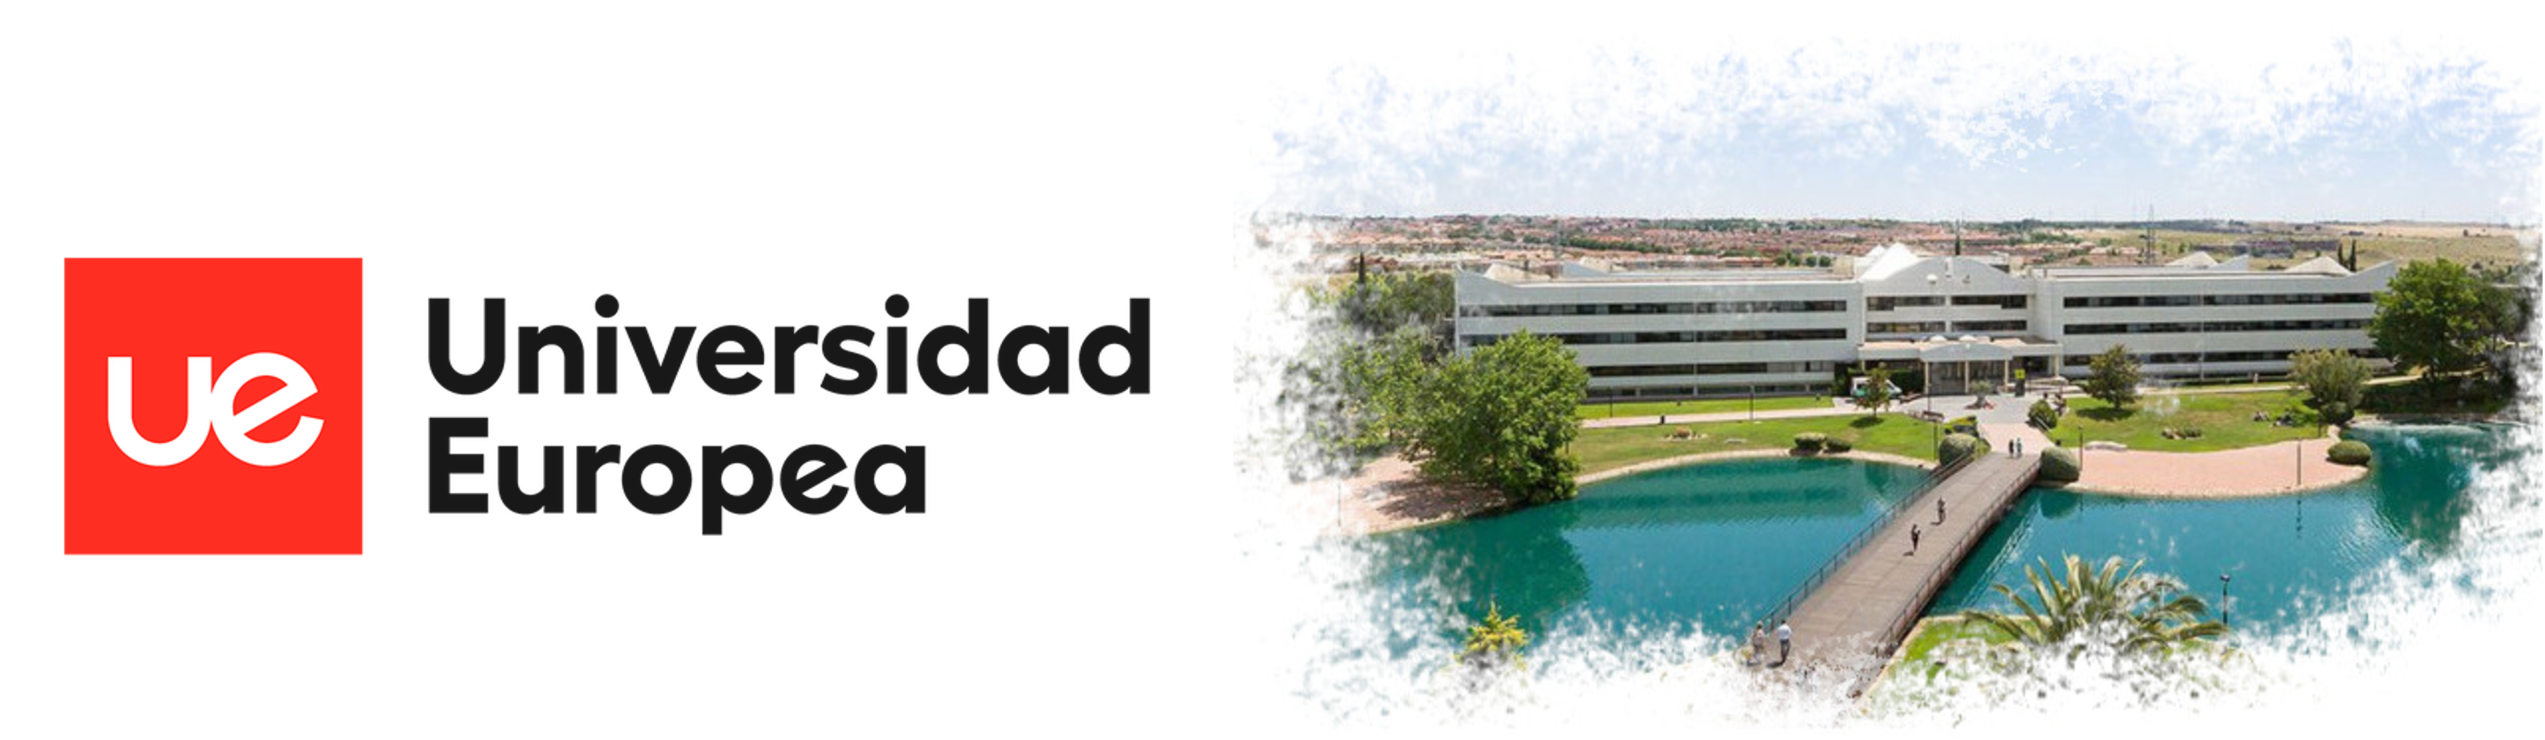

---
#**TALLER DE CONSTRUCCIÓN DE UN ÁRBOL FILOGENÉTICO**


**Objetivo del Taller**

<p align="Justify"> Este taller está diseñado para estudiantes con interés en la biología, biotecnología o ciencias relacionadas, y tiene como objetivo introducir los conceptos básicos y las técnicas computacionales para construir árboles filogenéticos. Utilizando Google Colab, una plataforma de notebook en la nube, exploraremos cómo alinear secuencias de aminoácidos y cómo estas alineaciones conducen al desarrollo de modelos filogenéticos que nos ayudan a entender las relaciones evolutivas entre diferentes organismos.


**¿Qué es un Árbol Filogenético?**

<p align="Justify"> Un árbol filogenético es un diagrama o representación gráfica que muestra las relaciones evolutivas entre diferentes especies basadas en sus características genéticas. Estos árboles son fundamentales en el estudio de la biología evolutiva porque ayudan a visualizar las <b>hipótesis</b> sobre el origen común y la diversificación de las especies.

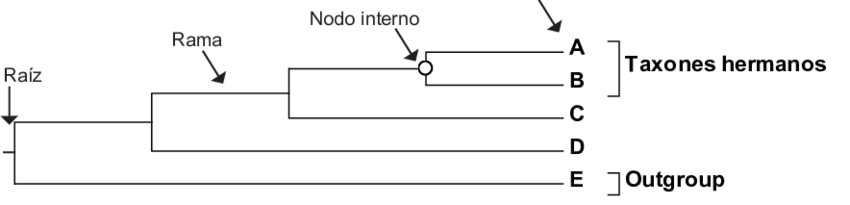

<p align="Justify"> <i>Figura procedente de: Mendoza, Javier. (2012). Aportes de la filogenética a la investigación médica. Revista Medica Herediana. 23. 119-127. 10.20453/rmh.v23i2.1042.</i>

<p align="Justify"> En un árbol filogenético, los nodos internos simbolizan a los ancestros comunes de dos o más grupos taxonómicos. Estos nodos están conectados por ramas, y el nodo más interno, o raíz, representa el ancestro común de todos los grupos presentes en el árbol. Si dos grupos comparten un ancestro que no es compartido con otros grupos, estos se consideran taxones hermanos. Además, se utiliza un "grupo externo", que está menos relacionado con los grupos de estudio, para determinar el punto de ramificación inicial del árbol.

**Importancia de los Árboles Filogenéticos**

<p align="Justify"> Los árboles filogenéticos no solo son esenciales para biólogos que estudian la evolución de las especies, sino también para investigaciones en medicina, donde pueden ayudar a rastrear la evolución de patógenos y prever la aparición de resistencias a medicamentos.



# **Herramientas Utilizadas**
<p align="Justify"> <b>Google Colab:</b> Utilizaremos Google Colab porque ofrece un entorno de Python que no requiere configuración y se ejecuta completamente en la nube. Esto permite a los estudiantes enfocarse en aprender y experimentar con biología computacional sin preocuparse por problemas de software o hardware.

<p align="Justify"> <b>Clustal Omega:</b> Un alineador de secuencias múltiples que facilita el análisis filogenético al crear alineaciones de secuencias de nucleótidos o proteínas de alta calidad.

<p align="Justify"> <b>Biopython:</b> Un conjunto de herramientas de software libre para la biología computacional, incluyendo funciones para la manipulación de secuencias de ADN/ARN y la construcción de árboles filogenéticos.

<p align="Justify"> <b>Matplotlib:</b> Una biblioteca de Python que utilizaremos para visualizar los árboles filogenéticos y otros datos biológicos de forma gráfica.

##**Introducción al Estudio de las proteínas de COX1 y COX2**

**Objetivo del Estudio**

Construir y analizar árboles filogenéticos, usando secuencias de aminoácidos de COX-1 y COX-2 de diversas especies, para entender las relaciones evolutivas.


**Importancia de COX1 y COX2**

Las ciclooxigenasas COX-1 y COX-2 son enzimas cruciales en la biosíntesis de prostaglandinas, que son mediadores lipídicos que juegan roles esenciales en numerosos procesos fisiológicos y patológicos.

**COX-1**: es una enzima constitutiva, presente de manera constante en muchos tejidos, y es esencial para funciones normales como la protección del estómago, el mantenimiento del flujo sanguíneo renal y la regulación de la coagulación sanguínea.

**COX-2**: es inducible y su expresión aumenta en respuesta a inflamación y estímulos patológicos. Esta enzima está involucrada en la mediación de inflamación y dolor, lo que la hace un objetivo importante para tratamientos antiinflamatorios.

Ambas enzimas son vitales pero tienen roles distintos en la homeostasis y en la respuesta a daños o estímulos patológicos.



# Estructura del Estudio

El taller está dividido en varias secciones, cada una diseñada para entender un aspecto del proceso de construcción de un árbol filogenético:

**1. Preparación del Entorno:** Instalación de todas las herramientas necesarias.

**2. Descarga de Secuencias:** Los árboles filogenéticos pueden ser construidos usando diversos tipos de datos, incluyendo tanto secuencias de nucleótidos como de aminoácidos. Cada tipo de secuencia proporciona información valiosa sobre las relaciones evolutivas entre las especies o taxones estudiados.En nuestro caso utilizaremos un conjunto de secuencias de aminoácidos ya preparados procedentes de Uniprot.

**3. Alineamiento de Secuencias:** Alineamiento de las secuencias de COX1 y COX2 usando Clustal Omega.

**4. Acortamiento de las secuencias:** para comparar zonas donde exista alineamiento.

**5. Construcción del Árbol:** Usar Biopython para construir y visualizar el árbol filogenético.




# 1. Preparación del Entorno de Trabajo en Google Colab para Análisis Filogenético
**Instalación de Herramientas Necesarias**

<p align="Justify">Antes de comenzar con el análisis filogenético de las secuencias de aminoácidos, es esencial preparar nuestro entorno de trabajo con todas las herramientas necesarias. Utilizaremos Google Colab para este propósito, ya que permite ejecutar código de Python directamente en la nube sin la necesidad de configuraciones complejas de software en tu ordenador personal.


**Paso 1: Instalación de Clustal Omega**

<p align="Justify">Clustal Omega es un software fundamental para el alineamiento múltiple de secuencias, y es crucial para nuestros análisis posteriores que requieren comparar secuencias genéticas o de proteínas de diferentes organismos para inferir relaciones filogenéticas.

In [1]:
#@title Instalación de Clustal Omega

# Actualiza los paquetes disponibles y sus versiones antes de instalar cualquier cosa
!sudo apt-get update &> /dev/null

# Instala Clustal Omega utilizando el gestor de paquetes de Linux, asegurando que todas las dependencias necesarias sean resueltas
!sudo apt-get install -y clustalo &> /dev/null


**Paso 2: Instalación de Biopython y Librerías de Visualización**

<p align="Justify">Biopython es una herramienta increíblemente útil para el procesamiento de datos biológicos, especialmente secuencias de ADN, mientras que Matplotlib y Bokeh son librerías de visualización que nos permitirán interpretar visualmente los datos y resultados obtenidos, como los árboles filogenéticos y alineamientos.

In [2]:
#@title Instalación de Biopython y Librerías de Visualización

# Instalar Biopython, Matplotlib, Bokeh y Panel
# Biopython para manipulación de secuencias y análisis filogenético
# Matplotlib y Bokeh para visualización gráfica de los datos
# Panel para crear dashboards interactivos en notebooks
!pip install biopython matplotlib bokeh panel &> /dev/null

**Configuración del Entorno de Notebook**

<p align="Justify">Una vez instaladas las herramientas, procedemos a importar los módulos necesarios para nuestro análisis. Importamos diversas funciones de Biopython necesarias para el alineamiento de secuencias y construcción de árboles filogenéticos, junto con componentes de Bokeh y Panel para la visualización interactiva.

In [3]:
#@title Importación de módulos necesarios
import numpy as np  # Biblioteca para operaciones matemáticas avanzadas
from Bio import AlignIO  # Funcionalidades para leer y escribir alineamientos de secuencias
import panel as pn  # Panel para dashboards interactivos
import subprocess  # Subprocess para ejecutar comandos del sistema desde Python

from bokeh.plotting import figure, output_notebook, show  # Herramientas de Bokeh para crear figuras y visualizarlas en el notebook
from bokeh.models import ColumnDataSource, Rect, Text, Range1d  # Modelos de Bokeh para gestionar datos y tipos de gráficos
from bokeh.layouts import gridplot  # Layout para organizar gráficos
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor  # Herramientas para calcular distancias y construir árboles

from Bio import Phylo  # Funcionalidades de Biopython para trabajar con árboles filogenéticos
pn.extension()  # Activar las extensiones de Panel para integración con notebooks


# 2. Configuración y Uso de Clustal Omega para Alineamiento de Secuencias
**Definición de Archivos de Entrada y Salida**

<p align="Justify">Antes de ejecutar el alineamiento, necesitamos especificar claramente cuáles serán nuestros archivos de entrada y salida en el código. Utilizaremos para ello, un archivo creado previamente con las secuencias de aminoácidos de las proteínas en formato FASTA:

In [4]:
#@title Definición de Archivos de Entrada y de Salida
# Descarga las secuencias en formato FASTA
!wget https://raw.githubusercontent.com/remesal-bio/phylogenetics/main/secuences.fasta -O secuencias.fasta &> /dev/null


# Comprobar el contenido del archivo para asegurarse de que se descargó correctamente
!head secuencias.fasta

# Define el archivo de entrada y salida
input_fasta = 'secuencias.fasta'  # El archivo FASTA que contiene las secuencias a alinear
output_alignment = 'alineamiento.clustalw'  # El archivo de salida donde se guardará el alineamiento


>COX1_HUMAN
MSRSLLLWFLLFLLLLPPLPVLLADPGAPTPVNPCCYYPCQHQGICVRFGLDRYQCDCTR
TGYSGPNCTIPGLWTWLRNSLRPSPSFTHFLLTHGRWFWEFVNATFIREMLMRLVLTVRS
NLIPSPPTYNSAHDYISWESFSNVSYYTRILPSVPKDCPTPMGTKGKKQLPDAQLLARRF
LLRRKFIPDPQGTNLMFAFFAQHFTHQFFKTSGKMGPGFTKALGHGVDLGHIYGDNLERQ
YQLRLFKDGKLKYQVLDGEMYPPSVEEAPVLMHYPRGIPPQSQMAVGQEVFGLLPGLMLY
ATLWLREHNRVCDLLKAEHPTWGDEQLFQTTRLILIGETIKIVIEEYVQQLSGYFLQLKF
DPELLFGVQFQYRNRIAMEFNHLYHWHPLMPDSFKVGSQEYSYEQFLFNTSMLVDYGVEA
LVDAFSRQIAGRIGGGRNMDHHILHVAVDVIRESREMRLQPFNEYRKRFGMKPYTSFQEL
VGEKEMAAELEELYGDIDALEFYPGLLLEKCHPNSIFGESMIEIGAPFSLKGLLGNPICS


# 3. Construcción del Comando para Clustal Omega

Para realizar el alineamiento, construimos un comando que será ejecutado en el sistema. Este comando invoca a Clustal Omega con los parámetros adecuados para procesar nuestras secuencias.

In [5]:
#@title Construcción del Comando Clustal Omega

# Construye el comando Clustal Omega
command = [
    'clustalo',  # Comando para Clustal Omega
    '-i', input_fasta,  # Especifica el archivo de entrada
    '-o', output_alignment,  # Especifica el archivo de salida
    '--force',  # Fuerza la sobreescritura del archivo de salida si ya existe
    '--outfmt=clustal'  # Especifica el formato de salida como Clustal
]

# Ejecuta el comando
result = subprocess.run(command, capture_output=True)


#Lectura y Visualización del Alineamiento Resultante
#Finalmente, leemos y mostramos el alineamiento resultante para verificar que todo ha sido realizado correctamente:
from Bio import AlignIO
alignment = AlignIO.read(output_alignment, "clustal")
print(alignment)

Alignment with 12 rows and 625 columns
-M------SRSLLLWFLLFLLLLPPLPVLLADPGAPTPVNPCCY...TEL COX1_HUMAN
MSRSSPSLRLPVLLLLLLLLLLPPPPPVLPADPGAPAPVNPCCY...TEL COX1_RABIT
MSRRSLSLQ----FPLLLLLLLLPPPPVLLTDAGVPSPVNPCCY...TEL COX1_RAT
MSRRSLSLW----FPLLLLLLLPPTPSVLLADPGVPSPVNPCCY...TEL COX1_MOUSE
MS------RQSISLRFPLLLLLLSPSPVFSADPGAPAPVNPCCY...TEL COX1_SHEEP
MGGGCRARAPPAALRLLVAHA---MLLCAAGSAAAAGTVNPCCY...TEL COX1_CHICKEN
---------------------MLARALLLCAVLALSHTANPCCS...TEL COX2_HUMAN
---------------------MLARALLLCAAVALSHAANPCCS...TEL COX2_RABIT
---------------------MLFRAVLLCAALALSHAANPCCS...TEL COX2_RAT
---------------------MLFRAVLLCAALGLSQAANPCCS...TEL COX2_MOUSE
---------------------MLARALLLCAAVV-CGAANPCCS...TEL COX2_SHEEP
--------------------------------------------...AEL COX_2_CHICKEN


<p align="Justify"> Para poder visualizarlo mejor, vamos a explorar cómo visualizar alineamientos de secuencias de aminoácidos utilizando Bokeh. Bokeh es una biblioteca de visualización que permite crear gráficos escalables, interactivos y estéticos, ideal para representar complejos conjuntos de datos biológicos como los alineamientos de secuencias.

In [6]:
#@title Visualización del aliniamiento múltiple
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, Range1d
from bokeh.layouts import gridplot
from Bio import AlignIO
import numpy as np

output_notebook()  # Inicializa la salida de Bokeh en el notebook para visualización

# Definición de función para asignar colores a los aminoácidos basado en el esquema Clustal
def assign_colors(sequences):
    color_scheme = {
    # Alifáticos/Hidrofóbicos - Rosa
    'I': 'pink', 'L': 'pink', 'V': 'pink', 'A': 'pink', 'M': 'pink',

    # Aromáticos - Naranja
    'F': 'orange', 'W': 'orange', 'Y': 'orange',

    # Positivos - Azul oscuro
    'K': 'blue', 'R': 'blue', 'H': 'blue',

    # Negativos - Rojo
    'D': 'red', 'E': 'red',

    # Hidrofílicos - Verde claro
    'S': 'green', 'T': 'green', 'N': 'green', 'Q': 'green',

    # Especialmente conformacionales - Magenta
    'P': 'magenta', 'G': 'magenta',

    # Cisteína - Amarillo
    'C': 'yellow',

    # Espacios o huecos en alineaciones - Blanco (opcional, si se desea incluir)
    '-': 'white'
}



    # Compila los colores para cada base en todas las secuencias
    color_mapping = [color_scheme[base] for seq in sequences for base in seq]
    return color_mapping

# Función para crear y mostrar el alineamiento visualizado
def display_alignment(alignment, font_size="8pt", width=950):
    sequences = [record.seq for record in alignment]
    identifiers = [record.id for record in alignment]
    color_list = assign_colors(sequences)
    length_of_sequences = len(sequences[0])
    number_of_sequences = len(sequences)
    height_of_plot = number_of_sequences * 15 + 50
    horizontal_range = Range1d(0, length_of_sequences + 1, bounds='auto')
    limited_view = (0, 100 if length_of_sequences > 100 else length_of_sequences)

    data_source = ColumnDataSource(data={'x': np.tile(np.arange(1, length_of_sequences + 1), number_of_sequences),
                                         'y': np.repeat(np.arange(number_of_sequences), length_of_sequences),
                                         'colors': color_list,
                                         'text': [base for seq in sequences for base in seq]})

    overview = figure(width=width, height=50, x_range=horizontal_range, y_range=(0, number_of_sequences),
                      toolbar_location='below', tools="xpan, xwheel_zoom, reset, save")
    overview.rect(x='x', y='y', width=1, height=1, source=data_source, color='colors', line_color=None)
    overview.grid.visible = False
    overview.axis.visible = False

    detailed_view = figure(width=width, height=height_of_plot, x_range=limited_view, y_range=identifiers,
                           toolbar_location='below', tools="xpan,reset")
    detailed_view.rect(x='x', y='y', width=1, height=1, source=data_source, color='colors', line_color=None, fill_alpha=0.4)
    detailed_view.text(x='x', y='y', text='text', source=data_source, text_align='center', text_font_size=font_size)
    detailed_view.grid.visible = False
    detailed_view.xaxis.major_label_text_font_style = "bold"

    show(gridplot([[overview], [detailed_view]], toolbar_location='below'))

# Alineamiento es leído desde el archivo generado por Clustal Omega
alignment_file = 'alineamiento.clustalw'  # Define el archivo de alineamiento recortado
alignment_format = 'clustal'  # Formato Clustal para leer el alineamiento
loaded_alignment = AlignIO.read(alignment_file, alignment_format)

# Ejecución de la visualización del alineamiento
display_alignment(loaded_alignment, width=950)


<p align="Justify"> Este fragmento de código está diseñado para calcular y visualizar la conservación de posiciones en un alineamiento de secuencias, utilizando Python con las bibliotecas NumPy y Matplotlib. El objetivo es identificar qué posiciones en el alineamiento son más conservadas a través de las secuencias, lo cual es fundamental para estudios de estructura y función de proteínas, así como para la inferencia filogenética.

<center>
 <b><small>Tabla 1. Esquema de colores Zappo: los residuos de aminoácidos se colorean de acuerdo con sus propiedades fisicoquímicas.</small></b>


| Residuos | Descripción                                  | Color        |
|----------|---------------------------------------------|--------------|
| ILVAM    | Alifáticos/Hidrofóbicos                     | Rosa         |
| FWY      | Aromáticos                                  | Naranja      |
| KRH      | Con carga positiva                          | Azul oscuro  |
| DE       | Con carga negativa                          | Rojo         |
| STNQ     | Hidrofílicos                                | Verde claro  |
| PG       | Prolina/Glicina (especialmente conformacional) | Magenta  |
| C        | Cisteína                                    | Amarillo     |


</center>



<p align="Justify"> Este tipo de gráfico es útil para evaluar qué partes de una secuencia están más conservadas, lo cual puede indicar regiones funcionales importantes o sitios de unión conservados, proporcionando insights valiosos para la investigación biológica y médica. Este análisis visual facilita la comprensión de los patrones de conservación y es esencial para cualquier estudio que involucre alineamientos de secuencias.

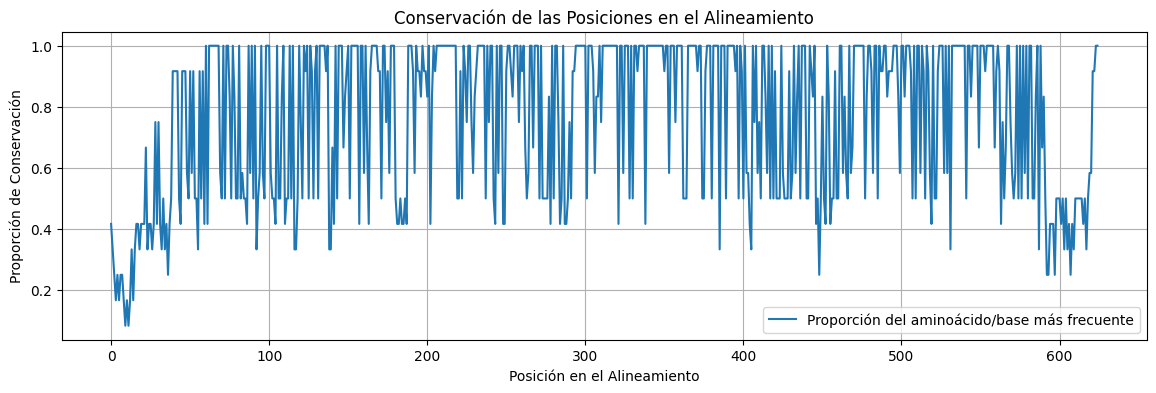

In [7]:
#@title Proporción de Posiciones conservadas
import numpy as np
import matplotlib.pyplot as plt

# Calcular la conservación por posición
conservation = np.zeros(alignment.get_alignment_length())
total_seqs = len(alignment)

for i in range(alignment.get_alignment_length()):
    freqs = {}
    for record in alignment:
        base = record.seq[i]
        if base != "-":
            freqs[base] = freqs.get(base, 0) + 1
    if freqs:
        conservation[i] = max(freqs.values()) / total_seqs

# Gráfico de la conservación
plt.figure(figsize=(14, 4))
plt.plot(conservation, label="Proporción del aminoácido/base más frecuente")
plt.title("Conservación de las Posiciones en el Alineamiento")
plt.xlabel("Posición en el Alineamiento")
plt.ylabel("Proporción de Conservación")
plt.legend()
plt.grid(True)
plt.show()



# 4. Refinamiento de Alineamientos: Eliminación de Columnas Incompletas
<p align="Justify">En la práctica de la bioinformática, especialmente en análisis filogenéticos y estructurales, es común refinar los alineamientos eliminando columnas incompletas—es decir, aquellas que contienen huecos (gaps). Estos huecos pueden introducir ruido en los análisis subsiguientes, como cálculos de conservación o construcción de árboles filogenéticos. A continuación, explicaremos cómo procesar un alineamiento para remover estas columnas y obtener un alineamiento "limpio" que solo contenga las regiones completamente conservadas entre las secuencias.

<p align="Justify">Este proceso no solo mejora la calidad del alineamiento para análisis evolutivos o estructurales, sino que también es esencial para asegurar la precisión en estudios de conservación de proteínas, donde las inserciones y deleciones pueden tener significados funcionales importantes. Este refinamiento es un paso crítico que precede análisis más complejos como la modelación de estructuras tridimensionales y la detección de sitios funcionales conservados.

In [8]:
#@title Alineamiento tras recortamiento

import sys
from Bio import AlignIO, SeqIO

# Lee el alineamiento desde el archivo generado por Clustal Omega
aln = AlignIO.read("alineamiento.clustalw", "clustal")

# Encuentra la primera columna completa (sin '-')
for fcol in range(aln.get_alignment_length()):
    if not "-" in aln[:, fcol]:
        position1 = fcol
        print("First full column is {}".format(fcol))
        break

# Encuentra la última columna completa (sin '-')
for lcol in reversed(range(aln.get_alignment_length())):
    if not "-" in aln[:, lcol]:
        position2 = lcol + 1
        print("Last full column is {}".format(lcol))
        break

# Guarda el alineamiento recortado en un nuevo archivo
with open("aligned_trimmed.clustalw", "w") as handle:
    count = SeqIO.write(aln[:, position1:position2], handle, "clustal")

# Lee el nuevo alineamiento recortado para confirmar
trimmed = AlignIO.read("aligned_trimmed.clustalw", "clustal")
print("Trimmed alignment:")
print(trimmed)

First full column is 53
Last full column is 624
Trimmed alignment:
Alignment with 12 rows and 572 columns
VRFGLDRYQCDCTRTGYSGPNCTIPGLWTWLRNSLRPSPSFTHF...TEL COX1_HUMAN
VRVALDRYQCDCTRTGYSGPNCTVPDLWTWLRSSLRPSPTFVHY...TEL COX1_RABIT
VRFGLDHYQCDCTRTGYSGPNCTIPEIWTWLRSSLRPSPSFTHF...TEL COX1_RAT
VRFGLDNYQCDCTRTGYSGPNCTIPEIWTWLRNSLRPSPSFTHF...TEL COX1_MOUSE
VRFGLDRYQCDCTRTGYSGPNCTIPEIWTWLRTTLRPSPSFIHF...TEL COX1_SHEEP
VRVGLEGYECDCTRTGYFGANCTSPELWTRLRDLLKPSPTFYHF...TEL COX1_CHICKEN
MSVGFDQYKCDCTRTGFYGENCSTPEFLTRIKLFLKPTPNTVHY...TEL COX2_HUMAN
MTMGFDQYKCDCTRTGFYGENCSTPEFLTRIKLLLKPTPDTVHY...TEL COX2_RABIT
MSIGFDQYKCDCTRTGFYGENCTTPEFLTRIKLLLKPTPNTVHY...TEL COX2_RAT
MSTGFDQYKCDCTRTGFYGENCTTPEFLTRIKLLLKPTPNTVHY...TEL COX2_MOUSE
MSVGFDQYKCDCTRTGFYGENCTTPEFLTRIKLLLKPTPDTVHY...TEL COX2_SHEEP
MTTGFDRYECDCTRTGYYGENCTTPEFFTWLKLILKPTPNTVHY...AEL COX_2_CHICKEN


In [9]:
#@title Visualización del aliniamiento múltiple tras recortado
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, Range1d
from bokeh.layouts import gridplot
from Bio import AlignIO
import numpy as np

output_notebook()  # Inicializa la salida de Bokeh en el notebook para visualización

# Definición de función para asignar colores a los aminoácidos basado en el esquema Clustal
def assign_colors(sequences):
    color_scheme = {
    # Alifáticos/Hidrofóbicos - Rosa
    'I': 'pink', 'L': 'pink', 'V': 'pink', 'A': 'pink', 'M': 'pink',

    # Aromáticos - Naranja
    'F': 'orange', 'W': 'orange', 'Y': 'orange',

    # Positivos - Azul oscuro
    'K': 'blue', 'R': 'blue', 'H': 'blue',

    # Negativos - Rojo
    'D': 'red', 'E': 'red',

    # Hidrofílicos - Verde claro
    'S': 'green', 'T': 'green', 'N': 'green', 'Q': 'green',

    # Especialmente conformacionales - Magenta
    'P': 'magenta', 'G': 'magenta',

    # Cisteína - Amarillo
    'C': 'yellow',

    # Espacios o huecos en alineaciones - Blanco (opcional, si se desea incluir)
    '-': 'white'
}



    # Compila los colores para cada base en todas las secuencias
    color_mapping = [color_scheme[base] for seq in sequences for base in seq]
    return color_mapping

# Función para crear y mostrar el alineamiento visualizado
def display_alignment(alignment, font_size="8pt", width=950):
    sequences = [record.seq for record in alignment]
    identifiers = [record.id for record in alignment]
    color_list = assign_colors(sequences)
    length_of_sequences = len(sequences[0])
    number_of_sequences = len(sequences)
    height_of_plot = number_of_sequences * 15 + 50
    horizontal_range = Range1d(0, length_of_sequences + 1, bounds='auto')
    limited_view = (0, 100 if length_of_sequences > 100 else length_of_sequences)

    data_source = ColumnDataSource(data={'x': np.tile(np.arange(1, length_of_sequences + 1), number_of_sequences),
                                         'y': np.repeat(np.arange(number_of_sequences), length_of_sequences),
                                         'colors': color_list,
                                         'text': [base for seq in sequences for base in seq]})

    overview = figure(width=width, height=50, x_range=horizontal_range, y_range=(0, number_of_sequences),
                      toolbar_location='below', tools="xpan, xwheel_zoom, reset, save")
    overview.rect(x='x', y='y', width=1, height=1, source=data_source, color='colors', line_color=None)
    overview.grid.visible = False
    overview.axis.visible = False

    detailed_view = figure(width=width, height=height_of_plot, x_range=limited_view, y_range=identifiers,
                           toolbar_location='below', tools="xpan,reset")
    detailed_view.rect(x='x', y='y', width=1, height=1, source=data_source, color='colors', line_color=None, fill_alpha=0.4)
    detailed_view.text(x='x', y='y', text='text', source=data_source, text_align='center', text_font_size=font_size)
    detailed_view.grid.visible = False
    detailed_view.xaxis.major_label_text_font_style = "bold"

    show(gridplot([[overview], [detailed_view]], toolbar_location='below'))

# Alineamiento es leído desde el archivo generado por Clustal Omega
alignment_file = 'aligned_trimmed.clustalw'  # Define el archivo de alineamiento recortado
alignment_format = 'clustal'  # Formato Clustal para leer el alineamiento
loaded_alignment = AlignIO.read(alignment_file, alignment_format)

# Ejecución de la visualización del alineamiento
display_alignment(loaded_alignment, width=950)

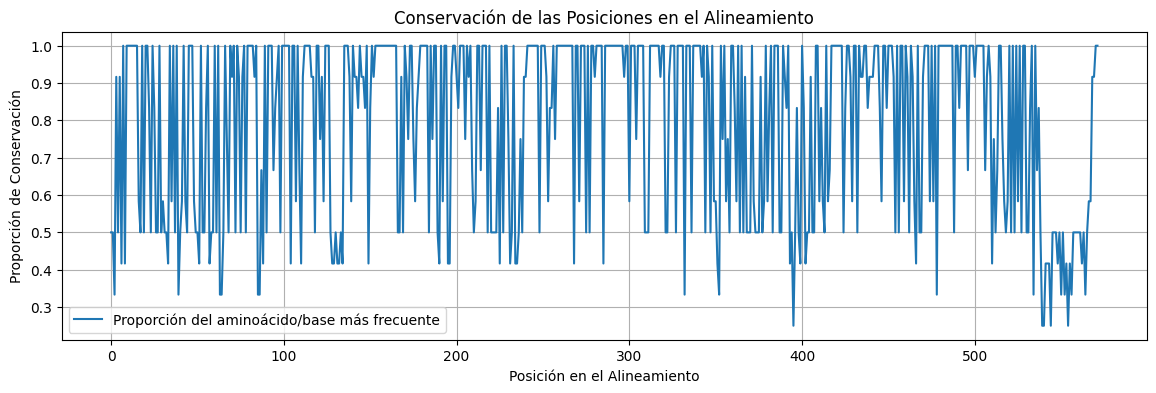

In [ ]:
#@title Proporción de Posiciones conservadas tras recortado
import numpy as np
import matplotlib.pyplot as plt

# Calcular la conservación por posición
conservation = np.zeros(trimmed.get_alignment_length())
total_seqs = len(trimmed)

for i in range(trimmed.get_alignment_length()):
    freqs = {}
    for record in trimmed:
        base = record.seq[i]
        if base != "-":
            freqs[base] = freqs.get(base, 0) + 1
    if freqs:
        conservation[i] = max(freqs.values()) / total_seqs

# Gráfico de la conservación
plt.figure(figsize=(14, 4))
plt.plot(conservation, label="Proporción del aminoácido/base más frecuente")
plt.title("Conservación de las Posiciones en el Alineamiento")
plt.xlabel("Posición en el Alineamiento")
plt.ylabel("Proporción de Conservación")
plt.legend()
plt.grid(True)
plt.show()


# 5. Construcción y Visualización de un Árbol Filogenético Utilizando el Método de Neighbor Joining
<p align="Justify">Tras preparar un alineamiento óptimo de secuencias, el siguiente paso en nuestro estudio filogenético es construir un árbol que visualice las relaciones evolutivas entre las secuencias basadas en sus distancias genéticas. Utilizaremos el método de **UPGMA**, supone tasas de evolución constantes.

# Paso 1: Cálculo de la Matriz de Distancia
<p align="Justify">Primero, calculamos la matriz de distancia entre todas las secuencias en nuestro alineamiento recortado. Esto se realiza con la herramienta DistanceCalculator de BioPython, especificando 'identity' como métrica, lo que significa que la distancia se mide como el complemento de la cantidad de coincidencias entre dos secuencias:

<p align="Justify"><b>DistanceCalculator('identity'):</b> Configura el calculador de distancia para usar la identidad de secuencias, donde las distancias son 1 menos el porcentaje de identidad entre dos secuencias.

# Paso 2: Construcción del Árbol con UPGMA
<p align="Justify">Utilizamos DistanceTreeConstructor para crear el árbol basado en la matriz de distancias calculada:

**constructor.upgma(distance_matrix)**

# Paso 3: Visualización del Árbol Filogenético
<p align="Justify">Finalmente, visualizamos el árbol usando Matplotlib y Bokeh para una interpretación clara y visual de las relaciones filogenéticas:

**Configuración de la figura:** Establecemos el tamaño y resolución adecuados para una visualización detallada.

**Phylo.draw():**

<p align="Justify">Este proceso no solo es fundamental para entender la evolución de las especies estudiadas sino que también proporciona una herramienta visual potente para presentar y discutir resultados en estudios genéticos, conservación de biodiversidad y otras áreas de investigación biológica. Visualizar estas relaciones en un árbol filogenético clarifica la dinámica evolutiva y ofrece perspectivas que son críticas para la interpretación biológica avanzada.

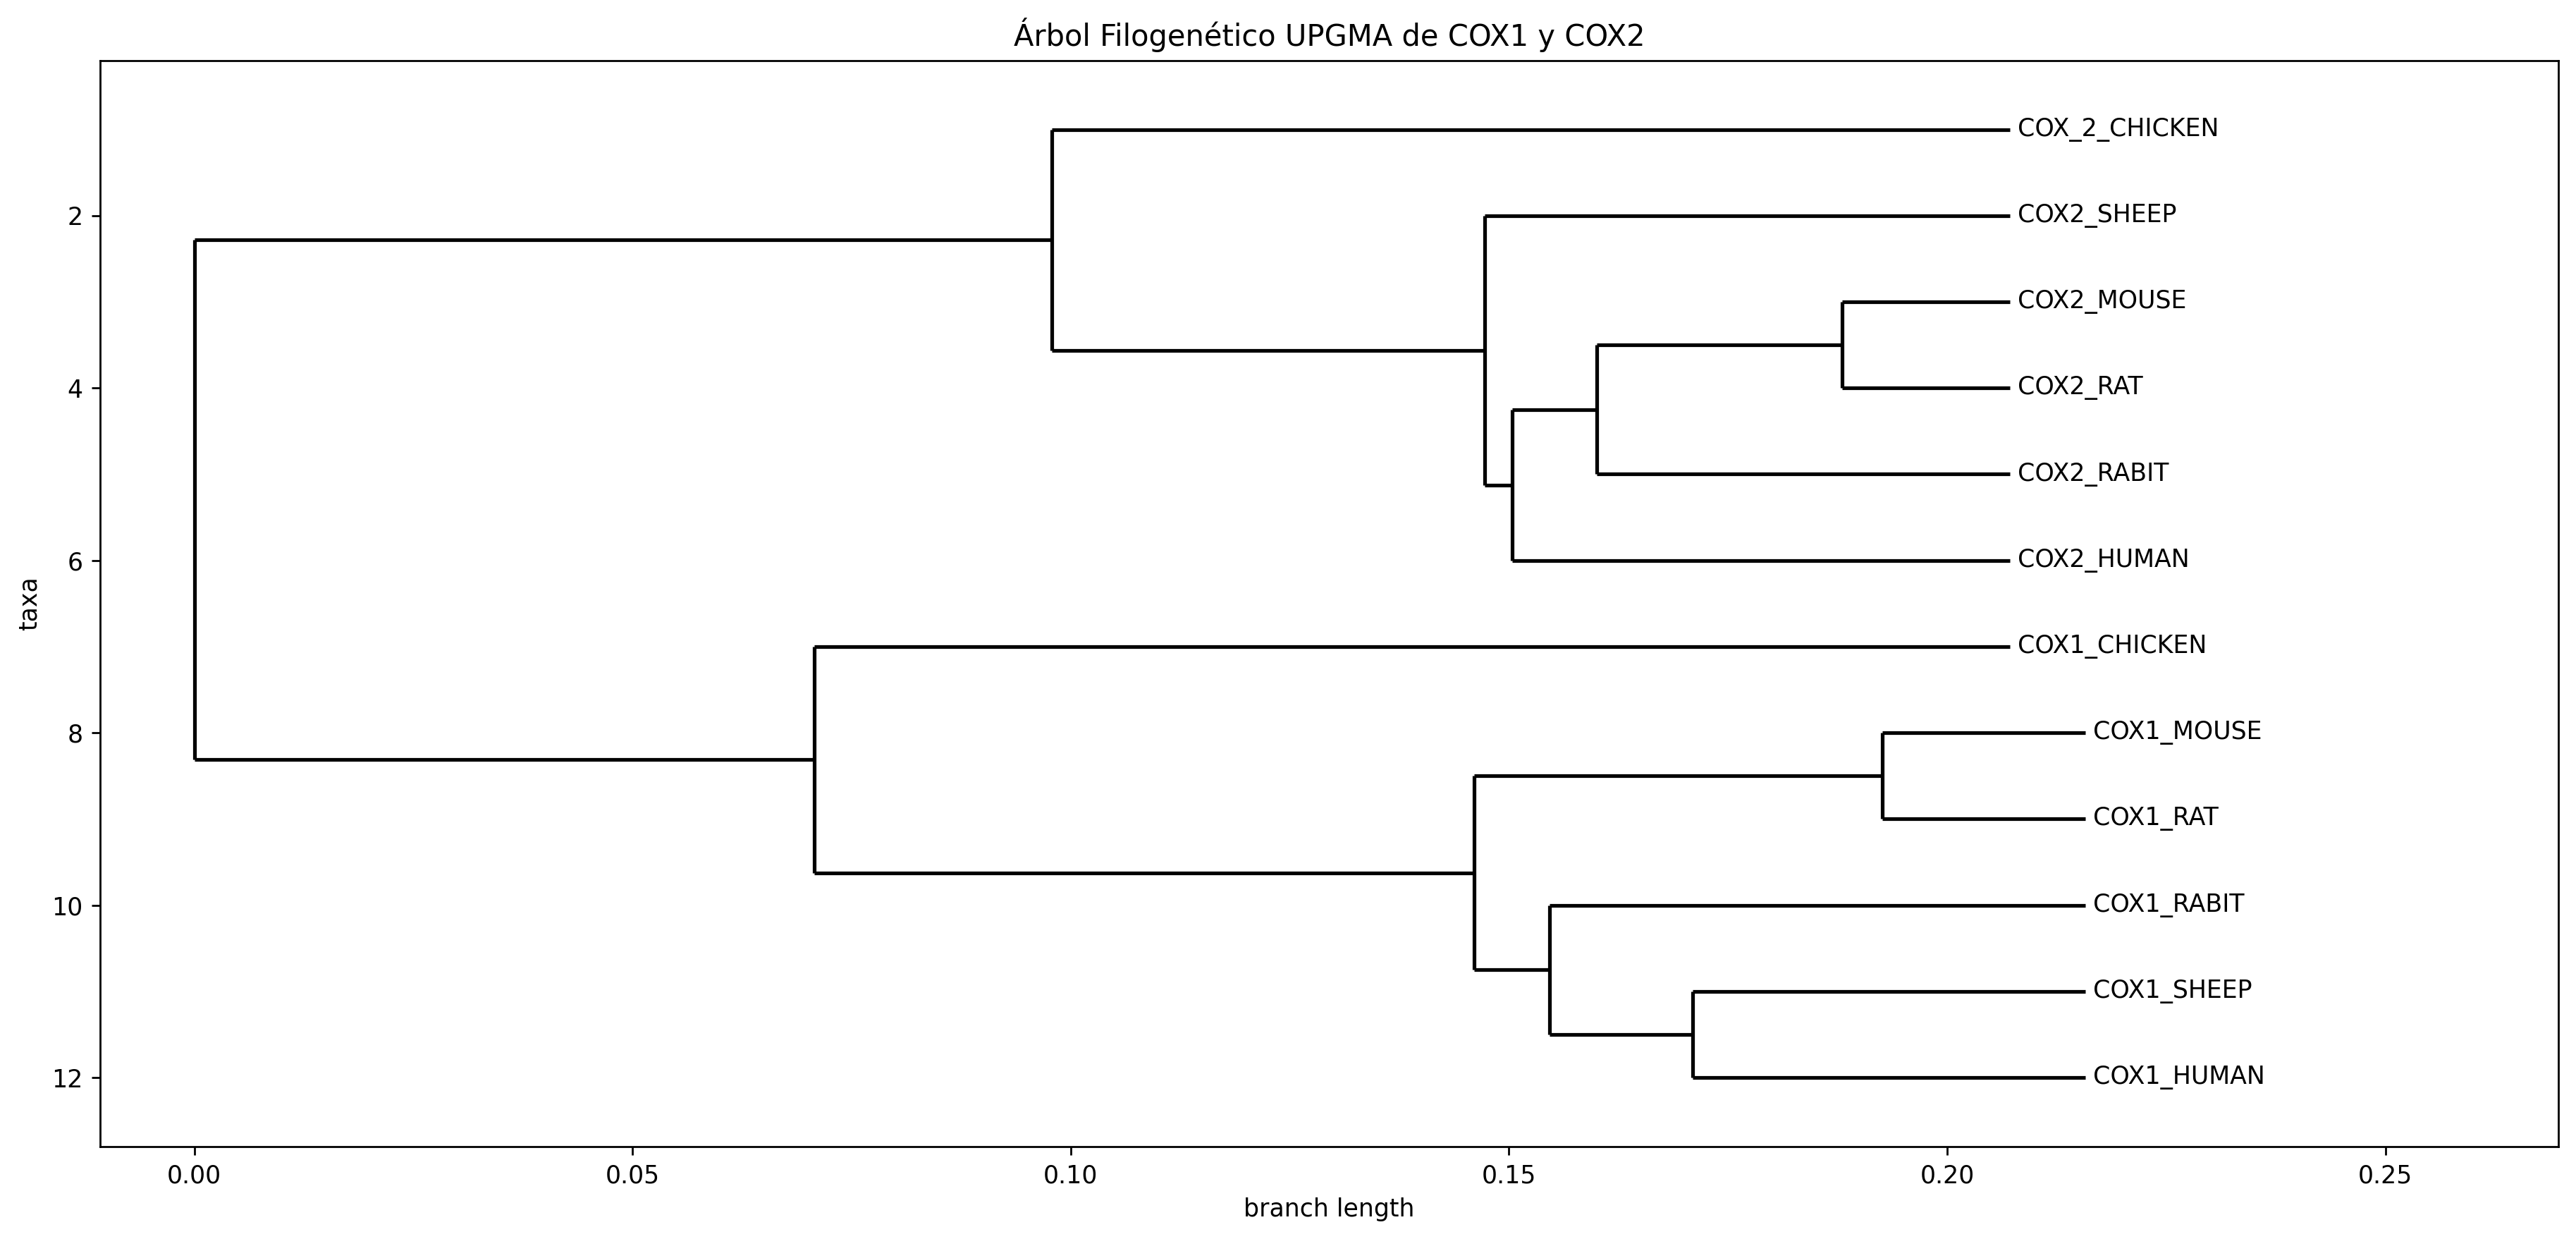

In [10]:
#@title Construcción Árbol Filogenético

from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo

# Calcula la matriz de distancia y construye el árbol usando el método NJ
calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(alignment)
constructor = DistanceTreeConstructor()
nj_tree = constructor.upgma(distance_matrix)

# Visualización del árbol con Matplotlib
fig = plt.figure(figsize=(18, 8), dpi=250)
axes = fig.add_subplot(1, 1, 1)
axes.set_title("Árbol Filogenético UPGMA de COX1 y COX2")
Phylo.draw(nj_tree, do_show=True, axes=axes,
 label_func=lambda x: None if x.is_terminal() is False else x.name)

plt.show()


En términos filogenéticos, COX-1 (ciclooxigenasa-1) y COX-2 (ciclooxigenasa-2) son isoenzimas que surgen de la duplicación de un gen ancestral común. Ambas enzimas son parte de la misma familia y comparten una alta similitud en su secuencia de aminoácidos, indicando un origen común en la evolución. Ambas evolucionaron a partir de ese ancestro común y adquirieron roles diferentes a lo largo de la evolución.

#Aplicaciones e implicaciones del Estudio de COX1 y COX2

<p align="Justify">El estudio de las enzimas COX-1 y COX-2 tiene amplias implicaciones en diversas áreas médicas y científicas. Aquí detallo algunas de las más significativas:


<p align="Justify">Desarrollo de Fármacos: El entendimiento de las funciones específicas de COX-1 y COX-2 ha permitido el diseño de medicamentos más específicos, como los inhibidores selectivos de COX-2, que reducen la inflamación y el dolor con menos efectos adversos gastrointestinales comparados con los AINEs tradicionales.

<p align="Justify"><b>1. Terapia personalizada:</b> Facilita el desarrollo de medicamentos específicos como los inhibidores de COX-2, que reducen la inflamación y el dolor con menores efectos secundarios gastrointestinales.

**2. Prevención de enfermedades:** COX-2 ha revelado su potencial en la prevención de ciertos tipos de cáncer, como el colorrectal.

**3. Investigación biomédica:** Ayuda a entender los mecanismos moleculares de inflamación y cáncer, abriendo puertas a nuevos tratamientos.


#Referencias

*   Chandrasekharan, N., & Simmons, D. L. (2004). Genome Biology, 5(9), 241.
*   <p align="Justify">Järving, R., Järving, I., Kurg, R., Brash, A. R., & Samel, N. (2004). On the evolutionary origin of cyclooxygenase (COX) isozymes: characterization of marine invertebrate COX genes points to independent duplication events in vertebrate and invertebrate lineages. Journal of Biological Chemistry, 279(14), 13624-13633.
